# Haar like features
Haar-like features are digital image features used in object recognition.

Here are some examples:

![img/haar.jpg](img/haar.jpg)

Each feature is computed by integrating the gray scale image.
The integral from the area which lie within the white rectangles is substracted from the value of the integral from the area that lies within the dark rectangles. Since image is made out of pixels, the value of this integral is a sum of all pixel values within the region.
![img/haarAplication.png](img/haarAplication.png)

Let's demonstrate the computation of the integral image on a simple example.

First let's load this image and resize it.

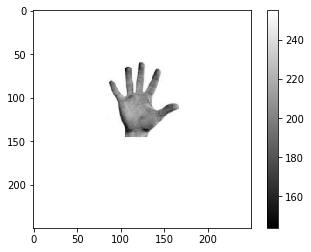

In [1]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('testImage.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (250, 250), interpolation = cv2.INTER_AREA)

plt.imshow(img ,cmap='gray')
plt.colorbar()
plt.show()

Now let's choose a region from the image.

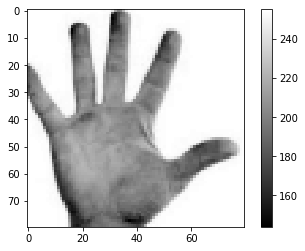

In [2]:
import numpy as np

pos = (90, 60)
size = (80, 80)
cropImg = np.array(img[pos[1]:pos[1]+size[1], pos[0]:pos[0]+size[0]])

plt.imshow(cropImg ,cmap='gray')
plt.colorbar()
plt.show()

Now let's generate example Haar feature.

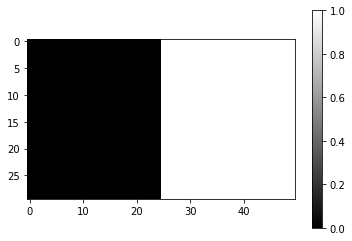

In [3]:
import numpy as np

def genHaarMagic(size):
    haar = np.zeros(size)
    for x in range(0, size[0]):
        for y in range(int(size[1]/2), size[1]):
            haar[x][y] = 1
            
    return haar

haar = genHaarMagic((30, 50))
plt.imshow(haar ,cmap='gray')
plt.colorbar()
plt.show()

Now let's apply the Haar feature. In order to do this we cut out from our rectangular region the matrix with the shape corresponding to the haar feature matrix size.

In [4]:
pos = (10, 10)
size = (haar.shape[1], haar.shape[0]) # rows and then columns douh!
areaUnderHaar = np.array(cropImg[pos[1]:pos[1]+size[1], pos[0]:pos[0]+size[0]])

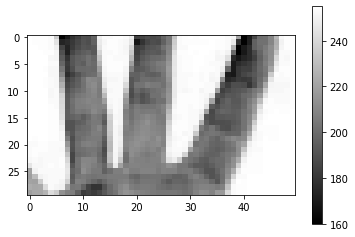

In [5]:
plt.imshow(areaUnderHaar, cmap='gray')
plt.colorbar()
plt.show()

Then we perform a piecewise multiplication with the Haar feature matrix.

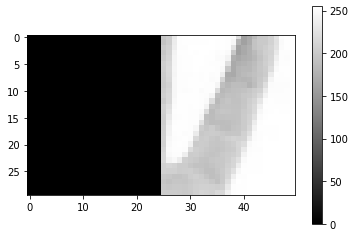

In [6]:
maskedImage = areaUnderHaar*(haar==1)

plt.imshow(maskedImage, cmap='gray')
plt.colorbar()
plt.show()

Then we compute the value of integral or in other words the sum of the whole matrix.

In [7]:
whiteInt = np.sum(maskedImage)
print(whiteInt)

171536


Then we can compute the integral over thr dark region of the Haar feature.

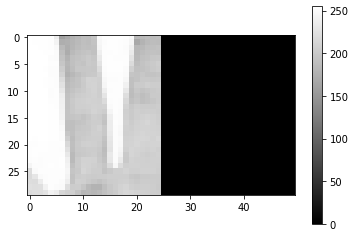

In [8]:
maskedImage = areaUnderHaar*(haar == 0)

plt.imshow(maskedImage, cmap='gray')
plt.colorbar()
plt.show()

In [9]:
darkInt = np.sum(maskedImage)
print(darkInt)

165976


And finally we can compute the value of our Haar feature.

In [10]:
haarValue = whiteInt - darkInt
print(haarValue)

5560


# Integral image
The above method is incredibly inefficient.
To speed up the computation of the integral we can use so called integral image.
Integral image is an image defined using a formula:

$$ I(x,y) = \sum_{x' \leq x \\ y' \leq y}^{} i(x', y')$$
Where I(x,y) is an integral image function and i(x, y) is an image function.

Integral image can be computed using the following formula.
$$ I(x,y) = i(x,y) + I(x, y-1) + I(x-1, y) - I(x-1, y-1) $$

Example:

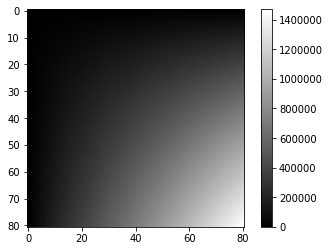

In [11]:
integralImage = cv2.integral(cropImg)

plt.imshow(integralImage, cmap='gray')
plt.colorbar()
plt.show()

We can use the integral image to compute the value of integral over the rectangle using the following formula.

$$ \sum_{x_0<x<x_1 \\ y_0<y<y_1}^{} i(x, y) = I(D) + I(A) - I(B) - I(C) $$

![imgsummedTable.png](img/summedTable.png)


# Computing Haar like features using integral image

Now let's compute the same Haar feature using integral image.
First we have to define the corners of the black and white areas of the Haar feature.

In [12]:
pos = (90, 60)
pos = (10, 10)
haar = genHaarMagic((30, 50))
haar_black = ((100, 70), (125, 70), (125, 100), (100, 100))
haar_white = ((125, 70), (150, 70), (125, 100), (150, 100))

Now we just have to apply integral image formula and we should get the same result as in the case of a classs

# Cascade classifier

# AdaBoost

# Training a detector